# Multiple Logistic Regression

In [1]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
file = pd.read_csv('multi_classification_train.csv')
print(file.shape)

(48000, 22)


In [ ]:
n_sets,n_features=file.shape
n_features=n_features-1
x_train=file.iloc[:,1:n_features]
x_train=x_train.values
y_train=file.iloc[:,n_features]
y_train=y_train.values
print(x_train.shape)
print(y_train.shape)

(48000, 20)
(48000,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math,copy
np.set_printoptions(precision=2)


In [ ]:
def train_test_split(X,y,test_size=0.2,random_state=None):
  if random_state is not None:
    np.random.seed(random_state)
  indices=np.arange(len(X))
  np.random.shuffle(indices)
  split_idx=int(len(X)*(1-test_size))
  train_indices=indices[:split_idx]
  test_indices=indices[split_idx:]
  X_train, X_test=X[train_indices],X[test_indices]
  y_train, y_test=y[train_indices],y[test_indices]
  return X_train,X_test,y_train, y_test

In [ ]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y - 1]

In [ ]:
def normalize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

In [ ]:
def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

In [ ]:
def compute(w_initial,b_initial,X_train,y_train,num_epochs,alpha):
  w=w_initial
  b=b_initial
  for epoch in range(num_epochs):
    logits = np.dot(X_train, w) + b
    probabilities = softmax(logits)
    loss = cross_entropy(y_train_encoded, probabilities)

    dj_dw = np.dot(X_train.T, (probabilities - y_train_encoded)) / X_train.shape[0]
    dj_db = np.sum(probabilities - y_train_encoded, axis=0, keepdims=True) / X_train.shape[0]
    w -= alpha * dj_dw
    b -= alpha * dj_db
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
  return w,b

In [ ]:
def compute_mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [ ]:
def evaluate_metrics(y_true, y_pred, num_classes):
    accuracy = np.mean(y_true == y_pred)

    precision_list = []
    recall_list = []
    f1_list = []

    for c in range(1, num_classes + 1):
        tp = np.sum((y_pred == c) & (y_true == c))
        fp = np.sum((y_pred == c) & (y_true != c))
        fn = np.sum((y_pred != c) & (y_true == c))

        precision = tp / (tp + fp + 1e-8)
        recall = tp / (tp + fn + 1e-8)
        f1 = 2 * precision * recall / (precision + recall + 1e-8)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    precision = np.mean(precision_list)
    recall = np.mean(recall_list)
    f1 = np.mean(f1_list)

    return accuracy, precision, recall, f1


In [ ]:
def confusion_matrix_manual(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        matrix[t - 1, p - 1] += 1
    return matrix



Epoch 0, Loss: 1.6094
Epoch 50, Loss: 1.3076
Epoch 100, Loss: 1.1196
Epoch 150, Loss: 0.9987
Epoch 200, Loss: 0.9164
Epoch 250, Loss: 0.8575
Epoch 300, Loss: 0.8134
Epoch 350, Loss: 0.7791
Epoch 400, Loss: 0.7517
Epoch 450, Loss: 0.7293



w final : [[-8.36e-02  6.07e-02 -2.02e-01  2.30e-01 -4.50e-03]
 [ 5.79e-01 -2.00e-01 -1.42e-01 -1.64e-01 -7.28e-02]
 [-1.14e-01  2.29e-01  1.62e-01 -3.51e-01  7.36e-02]
 [-2.33e-01  1.28e-01  2.58e-01 -1.06e-01 -4.63e-02]
 [ 7.79e-03 -2.89e-03 -1.29e-03  2.09e-04 -3.83e-03]
 [-5.05e-03  6.51e-03 -8.17e-05 -1.45e-03  7.34e-05]
 [ 8.38e-02  3.50e-02  1.52e-01 -1.62e-01 -1.09e-01]
 [ 1.55e-01  2.10e-02  9.67e-02 -1.60e-01 -1.13e-01]
 [-3.55e-01  1.51e-02 -4.93e-02  2.12e-01  1.78e-01]
 [ 2.06e-01  3.07e-01 -3.16e-01 -4.05e-02 -1.57e-01]
 [ 3.08e-01 -4.40e-01  2.38e-02  1.49e-01 -4.00e-02]
 [ 3.08e-01 -4.40e-01  2.38e-02  1.49e-01 -4.00e-02]
 [ 3.02e-02 -1.69e-01  1.68e-02  2.49e-01 -1.27e-01]
 [ 3.01e-01 -3.48e-02 -3.23e-01  4.33e-02  1.37e-02]
 [-6.52e

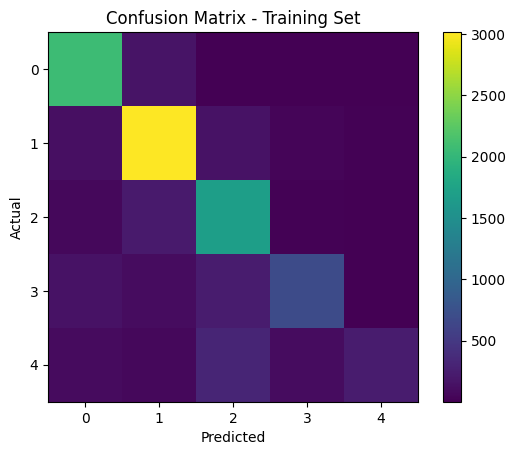

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
X_train = normalize(X_train)
X_test = normalize(X_test)
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]
y_train_encoded = one_hot_encode(y_train, num_classes)
w_initial = np.zeros((num_features, num_classes))
b_initial = np.zeros((1, num_classes))
num_epochs=500
alpha=0.01
w_final,b_final=compute(w_initial,b_initial,X_train,y_train,num_epochs,alpha)
y_test_encoded=one_hot_encode(y_test,num_classes)
logits = np.dot(X_test, w_final) + b_final
probabilities = softmax(logits)
loss = cross_entropy(y_test_encoded, probabilities)
print(f"\n\n\nw final : {w_final}, b final : {b_final}")
print(f"Final loss : {loss}")
logits = np.dot(X_test, w_final) + b_final
y_pred= np.argmax(softmax(logits), axis=1) + 1
mse=compute_mean_squared_error(y_test,y_pred)
accuracy,precision,recall,f1_score=evaluate_metrics(y_test,y_pred,num_classes)
print(f"\n\n\nMean squared error: {mse}")
print(f"\nAccuracy: {accuracy*100}")
print(f"\nPrecision: {precision}\n")
print(f"\nRecall: {recall}\n")
print(f"\nF1 Score: {f1_score}\n\n\n")

#confusion matrix
conf_matrix = confusion_matrix_manual(y_test,y_pred, num_classes)
plt.imshow(conf_matrix, cmap='viridis', interpolation='nearest')
plt.title("Confusion Matrix - Training Set")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving multi_classification_test.csv to multi_classification_test.csv


In [ ]:
import pandas as pd
file = pd.read_csv('multi_classification_test.csv')
print(file.shape)

(12000, 21)


In [ ]:
n_sets,n_features=file.shape
x_test=file.iloc[:,1:n_features]
x_test=x_test.values
print(x_train.shape)

(48000, 20)


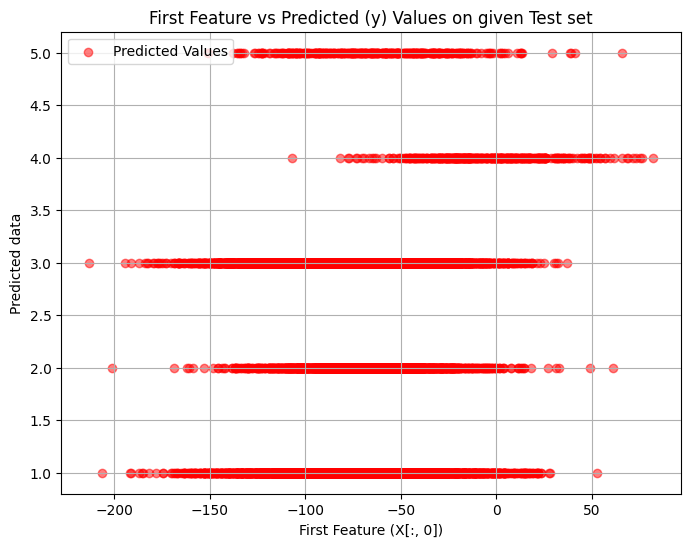

In [ ]:
logits = np.dot(x_test, w_final) + b_final
y_pred= np.argmax(softmax(logits), axis=1) + 1
plt.figure(figsize=(8, 6))
plt.scatter(x_test[:, 0], y_pred, color="red", alpha=0.5, label="Predicted Values")
plt.xlabel("First Feature (X[:, 0])")
plt.ylabel("Predicted data")
plt.title("First Feature vs Predicted (y) Values on given Test set")
plt.legend()
plt.grid(True)
plt.show()